In [45]:
import pandas as pd 
import os

In [46]:
problem_number = 3
files_in_dir = os.listdir(f'results_maxcut_{problem_number}/optimal')
files_in_dir = [file for file in files_in_dir if file.endswith('.csv')]
files_in_dir[:5]

['results_optimal_1_100.csv',
 'results_optimal_25_100.csv',
 'results_optimal_8_100.csv',
 'results_optimal_13_100.csv',
 'results_optimal_9_100.csv']

In [47]:
max_layers = 30
repetition = 100
dfs = []
for layer in range(1, max_layers+1):
    file_name = f'results_optimal_{layer}_{repetition}.csv'
    if file_name in files_in_dir:
        df = pd.read_csv(f'results_maxcut_{problem_number}/optimal/{file_name}')
        dfs.append(df)

In [48]:
dfs[0].head()

,Unnamed: 0,problem,layers,optimizer,solutions,parameters,time
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 1], -8.0), ([0, 1, 1], -13.0), ([1, 1...","[array([2.10344035, 7.07112461]), array([6.937...","[0.6596763134002686, 0.3276388645172119, 0.252..."


In [49]:
import QAOA_Tester as qtee

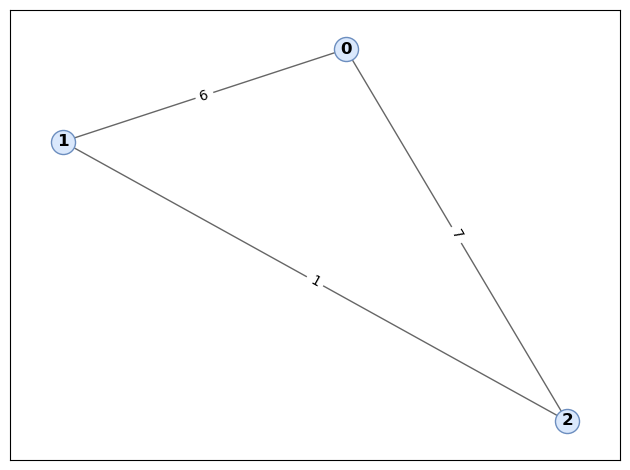

[0, 1, 1]


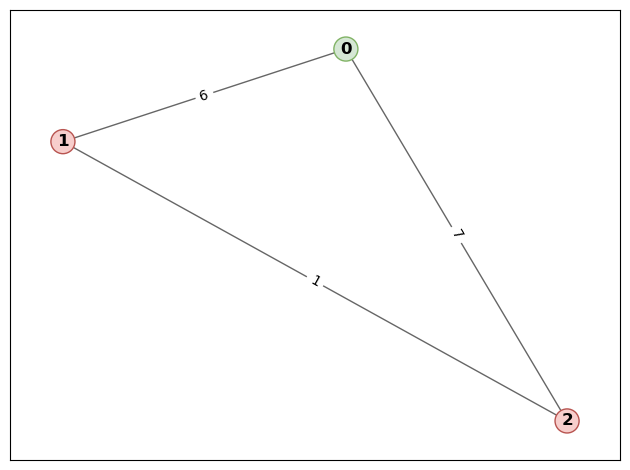

In [50]:
problem_description = eval(dfs[0]['problem'][0])
problem_description
problem = qtee.ProblemGenerator.from_dict(problem_description)
problem.visualize_problem()
problem.visualize_solution()

In [51]:
best_solution = problem.solution
best_solution

([0, 1, 1], 13.0)

In [52]:
solution_30 = eval(dfs[29]['solutions'][0])
sum_of_scores = 0
for solution in solution_30:
    sum_of_scores += solution[1]
    # print(solution[1])
print(sum_of_scores)
print(-sum_of_scores/100)

-797.0
7.97


In [53]:
avg_scores = pd.DataFrame(columns=['layer', 'score', 'time'])
for df in dfs:
    scores = eval(df['solutions'][0])
    avg_score = sum([-score[1] for score in scores])/len(scores)
    layer = int(df['layers'][0])
    times = eval(df['time'][0])
    avg_time = sum(times)/len(times)
    avg_scores.loc[len(avg_scores)] = [layer, avg_score, avg_time]
    

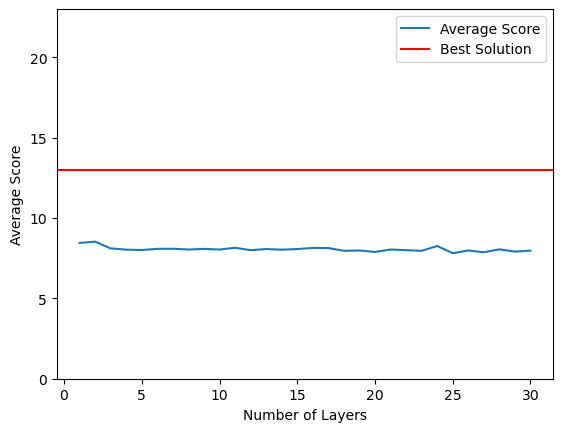

Text(0, 0.5, 'Average Time in Seconds')

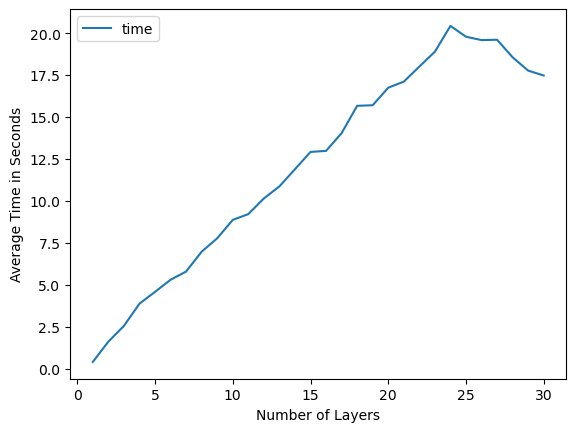

In [54]:
avg_scores.plot(x='layer', y='score')
# add a red line for the best solution
import matplotlib.pyplot as plt
plt.axhline(y=best_solution[1], color='r', linestyle='-')
# the red line should start at x=0 and end at x=max_layers
plt.xlabel('Number of Layers')
plt.ylabel('Average Score')
plt.legend(['Average Score', 'Best Solution'])
# the y axis has to include 0 to max score
plt.ylim(0, best_solution[1]+10)
plt.show()
avg_scores.plot(x='layer', y='time')
plt.xlabel('Number of Layers')
plt.ylabel('Average Time in Seconds')

(0.0, 110.0)

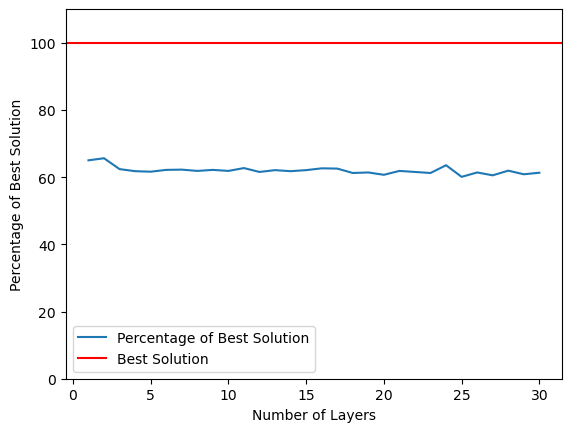

In [55]:
# lets assume the maximum score to be 100% and calculate the percentage of the average score
avg_scores['percentage'] = avg_scores['score']/best_solution[1]*100
avg_scores.plot(x='layer', y='percentage')
plt.axhline(y=100, color='r', linestyle='-')
plt.xlabel('Number of Layers')
plt.ylabel('Percentage of Best Solution')
plt.legend(['Percentage of Best Solution', 'Best Solution'])
plt.ylim(0, 110)

In [56]:
noisy_files_in_dir = os.listdir('results_maxcut_10/noisy')
noisy_files_in_dir = [file for file in noisy_files_in_dir if file.endswith('.csv')]
noisy_files_in_dir[:5]

['results_noisy_4_64.csv',
 'results_noisy_16_73.csv',
 'results_noisy_4_70.csv',
 'results_noisy_16_67.csv',
 'results_noisy_3_79.csv']

In [57]:
dfs_noisy = []
for layer in range(1, max_layers+1):
    for i in range(1, repetition+1):
        file_name = f'results_noisy_{layer}_{i}.csv'
        if file_name in noisy_files_in_dir:
            df = pd.read_csv(f'results_maxcut_{problem_number}/noisy/{file_name}')
            dfs_noisy.append(df)

In [58]:
dfs_noisy[2].head()

,Unnamed: 0,problem,layers,optimizer,solutions,parameters,time
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 0, 1, 0, 1, 1, 0, 0, 0], -31.0)]","[array([2.00143544, 2.8191579 ])]",[228.65208554267883]


In [15]:
# merge all the dataframes into one
df_noisy = pd.concat(dfs_noisy)
df_noisy


,Unnamed: 0,problem,layers,optimizer,solutions,parameters,time
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 0, 1, 0, 1, 0, 1, 0, 1], -50.0)]","[array([4.96665455, 1.30251696])]",[134.55752754211426]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0)]","[array([3.3289587 , 5.15441456])]",[151.0967161655426]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 0, 1, 0, 1, 1, 0, 0, 0], -31.0)]","[array([2.00143544, 2.8191579 ])]",[228.65208554267883]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 1, 0, 1, 0, 1, 1, 0, 1, 1], -46.0)]","[array([2.33709518, 0.85112958])]",[206.8128101825714]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 0, 1, 1, 1, 1, 0, 1], -65.0)]","[array([2.89418487, 4.22923611])]",[16486.353487968445]
...,...,...,...,...,...,...,...
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 1, 1, 0, 0, 0, 1, 0, 0], -51.0)]","[array([3.74634356, 4.13475675, 3.87326305, 5....",[2754.5860364437103]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 0, 1, 0, 1, 1, 0, 1], -62.0)]","[array([5.55704622, 5.73432864, 2.52241546, 5....",[3022.071778535843]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 0, 1, 1, 1, 0, 1, 1, 0], -60.0)]","[array([2.2437436 , 3.50456142, 5.59382029, 2....",[2728.275640487671]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 1, 1, 0, 1, 1, 1, 0, 0], -43.0)]","[array([3.56628458, 6.08992361, 2.56950477, 4....",[2691.1871950626373]


In [16]:
eval(df_noisy['solutions'].iloc[0])[0][1]
# df_noisy['solutions'].apply(lambda x: print(eval(x)[0]))
df_noisy.tail()

,Unnamed: 0,problem,layers,optimizer,solutions,parameters,time
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 1, 1, 0, 0, 0, 1, 0, 0], -51.0)]","[array([3.74634356, 4.13475675, 3.87326305, 5....",[2754.5860364437103]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 0, 1, 0, 1, 1, 0, 1], -62.0)]","[array([5.55704622, 5.73432864, 2.52241546, 5....",[3022.071778535843]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 0, 1, 1, 1, 0, 1, 1, 0], -60.0)]","[array([2.2437436 , 3.50456142, 5.59382029, 2....",[2728.275640487671]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 1, 1, 0, 1, 1, 1, 0, 0], -43.0)]","[array([3.56628458, 6.08992361, 2.56950477, 4....",[2691.1871950626373]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 1, 1, 1, 0, 0, 0, 1, 1], -31.0)]","[array([2.43052928, 3.37821623, 3.05313677, 5....",[2702.729146718979]


In [30]:
#give every row a unique index
df_noisy.reset_index(drop=True, inplace=True)
df_noisy.tail()

,Unnamed: 0,problem,layers,optimizer,solutions,parameters,time
2995,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 1, 1, 0, 0, 0, 1, 0, 0], -51.0)]","[array([3.74634356, 4.13475675, 3.87326305, 5....",[2754.5860364437103]
2996,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 0, 1, 0, 1, 1, 0, 1], -62.0)]","[array([5.55704622, 5.73432864, 2.52241546, 5....",[3022.071778535843]
2997,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 0, 1, 1, 1, 0, 1, 1, 0], -60.0)]","[array([2.2437436 , 3.50456142, 5.59382029, 2....",[2728.275640487671]
2998,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 1, 1, 0, 1, 1, 1, 0, 0], -43.0)]","[array([3.56628458, 6.08992361, 2.56950477, 4....",[2691.1871950626373]
2999,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 1, 1, 1, 0, 0, 0, 1, 1], -31.0)]","[array([2.43052928, 3.37821623, 3.05313677, 5....",[2702.729146718979]


In [27]:
def find_problematic_row(df, column):
    problematic_rows = []
    for index, value in df[column].items():
        try:
            eval(value)
        except Exception as e:
            problematic_rows.append((index, value, str(e)))
    return problematic_rows

In [28]:
problematic_rows = find_problematic_row(df_noisy, 'solutions')

problematic_rows

[]

In [33]:
# drop column unnamed 0 parameters
df_noisy.drop(columns='Unnamed: 0', inplace=True)
df_noisy.head()


,problem,layers,optimizer,solutions,parameters,time
0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 0, 1, 0, 1, 0, 1, 0, 1], -50.0)]","[array([4.96665455, 1.30251696])]",[134.55752754211426]
1,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0)]","[array([3.3289587 , 5.15441456])]",[151.0967161655426]
2,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 0, 1, 0, 1, 1, 0, 0, 0], -31.0)]","[array([2.00143544, 2.8191579 ])]",[228.65208554267883]
3,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 1, 0, 1, 0, 1, 1, 0, 1, 1], -46.0)]","[array([2.33709518, 0.85112958])]",[206.8128101825714]
4,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 0, 1, 1, 1, 1, 0, 1], -65.0)]","[array([2.89418487, 4.22923611])]",[16486.353487968445]


In [39]:
def create_summary_dataframe(df):
    layers = df['layers'].unique()
    summary_df = pd.DataFrame(columns=['layer', 'avg_score', 'avg_time'])
    for layer in layers:
        layer_df = df[df['layers'] == layer]
        scores = layer_df['solutions'].apply(lambda x: eval(x)[0][1])
        avg_score = scores.mean()
        times = layer_df['time'].apply(lambda x: eval(x)[0])
        avg_time = times.mean()
        summary_df.loc[len(summary_df)] = [layer, -avg_score, avg_time]

    return summary_df


summary_df = create_summary_dataframe(df_noisy)

In [40]:
summary_df


,layer,avg_score,avg_time
0,1.0,46.11,840.706081
1,2.0,44.15,343.553261
2,3.0,45.66,525.931775
3,4.0,46.78,725.067128
4,5.0,47.34,898.932678
5,6.0,45.92,1034.800492
6,7.0,45.91,1112.306394
7,8.0,47.32,1205.614566
8,9.0,45.81,1283.519861
9,10.0,46.16,1380.492317


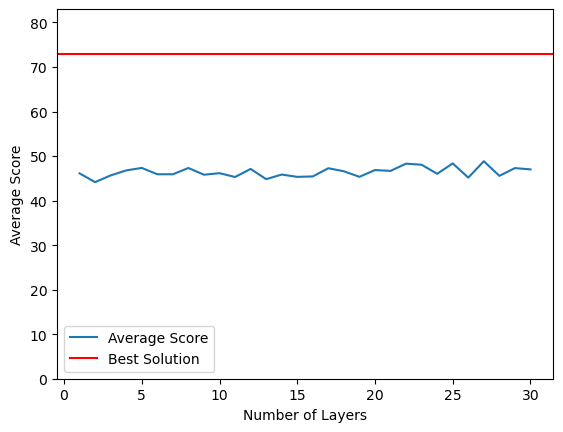

Text(0, 0.5, 'Average Time in Seconds')

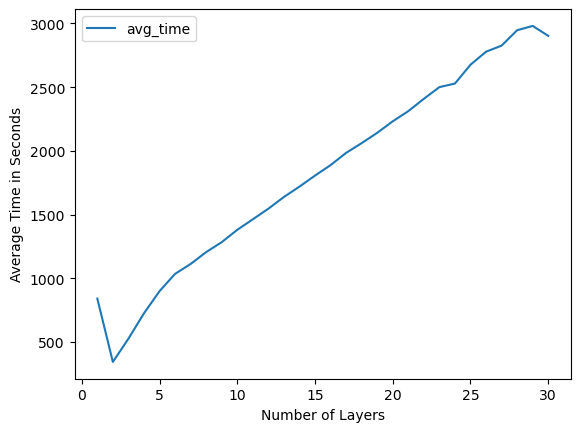

In [42]:
summary_df.plot(x='layer', y='avg_score')
# add a red line for the best solution
import matplotlib.pyplot as plt
plt.axhline(y=best_solution[1], color='r', linestyle='-')
# the red line should start at x=0 and end at x=max_layers
plt.xlabel('Number of Layers')
plt.ylabel('Average Score')
plt.legend(['Average Score', 'Best Solution'])
# the y axis has to include 0 to max score
plt.ylim(0, best_solution[1]+10)
plt.show()
summary_df.plot(x='layer', y='avg_time')
plt.xlabel('Number of Layers')
plt.ylabel('Average Time in Seconds')

(0.0, 110.0)

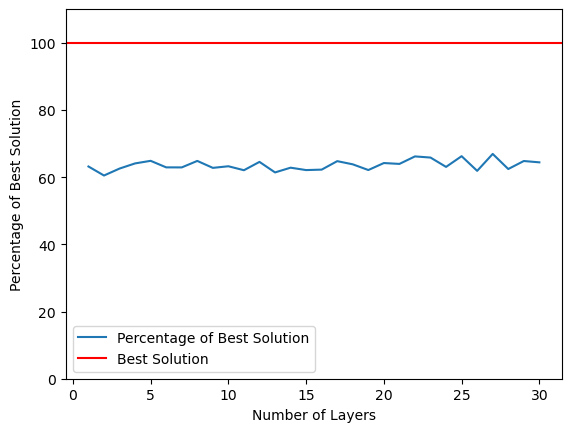

In [43]:
# lets assume the maximum score to be 100% and calculate the percentage of the average score
summary_df['percentage'] = summary_df['avg_score']/best_solution[1]*100
summary_df.plot(x='layer', y='percentage')
plt.axhline(y=100, color='r', linestyle='-')
plt.xlabel('Number of Layers')
plt.ylabel('Percentage of Best Solution')
plt.legend(['Percentage of Best Solution', 'Best Solution'])
plt.ylim(0, 110)